In [1]:
import numpy as np
from astropy.table import Table
from SED_Model import lrt_model

In [2]:
#Read the photometry. 
tab = Table.read("20random_sources.dat", format='ascii.csv')

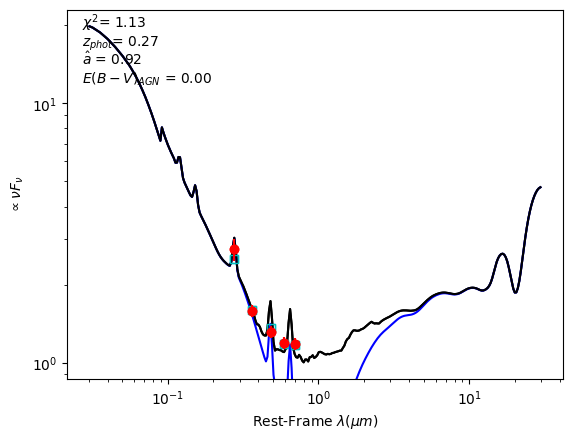

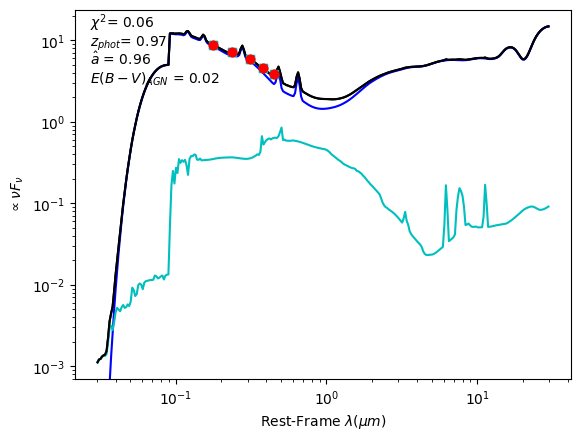

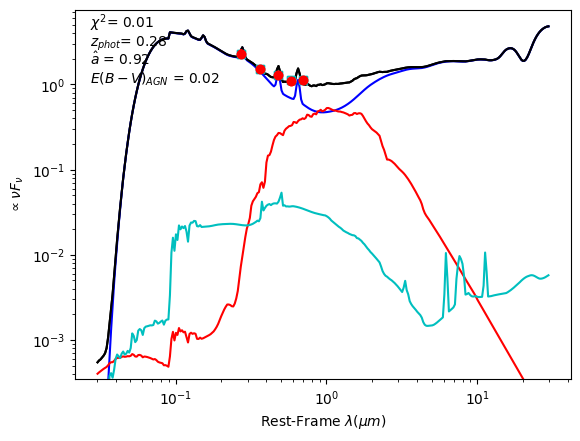

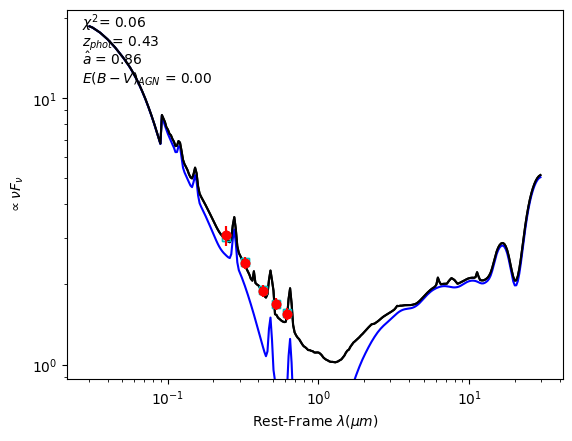

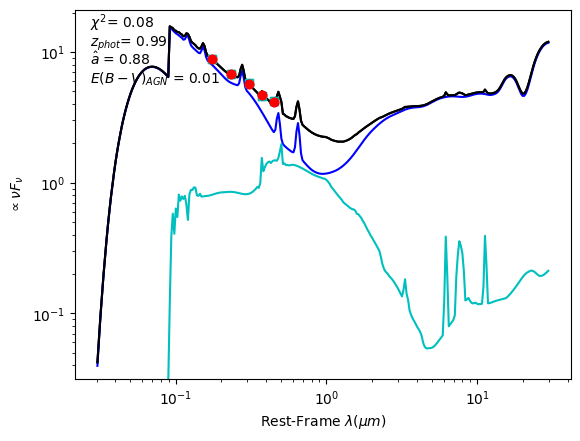

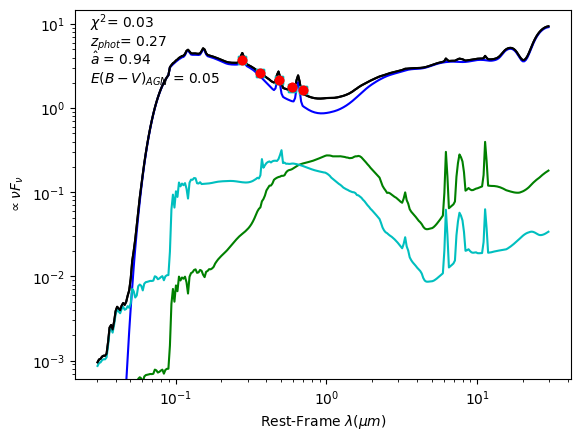

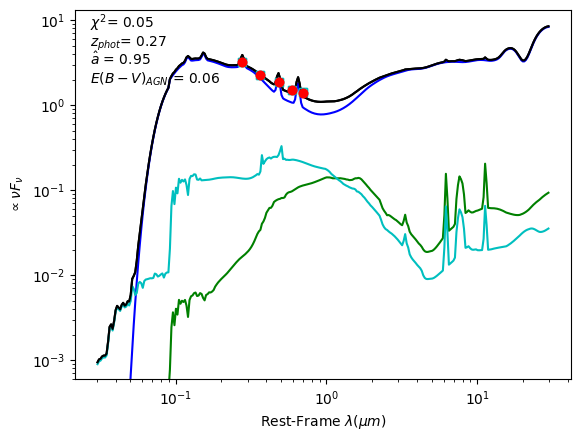

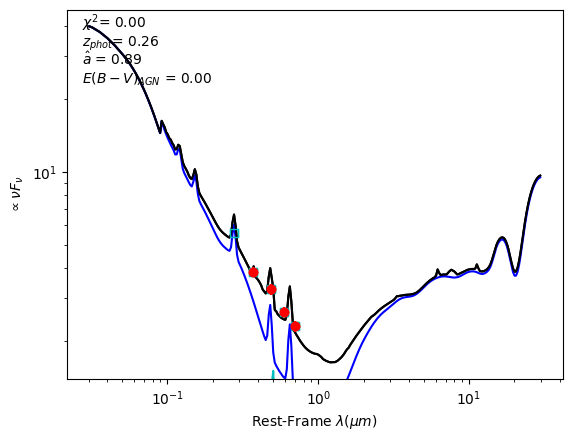

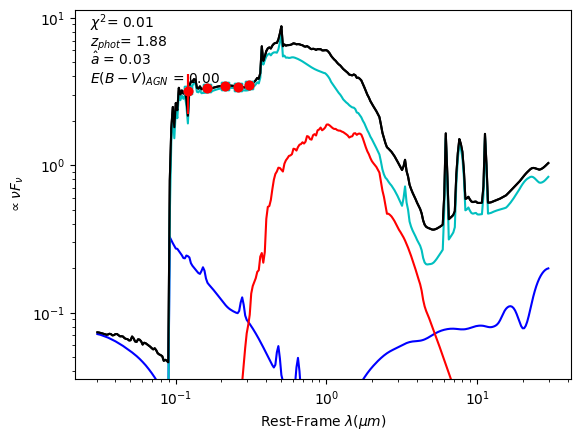

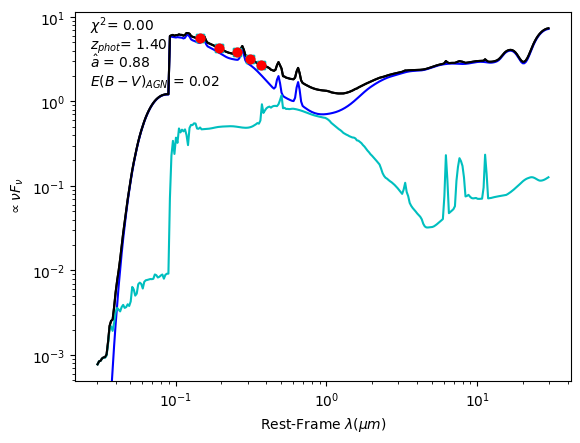

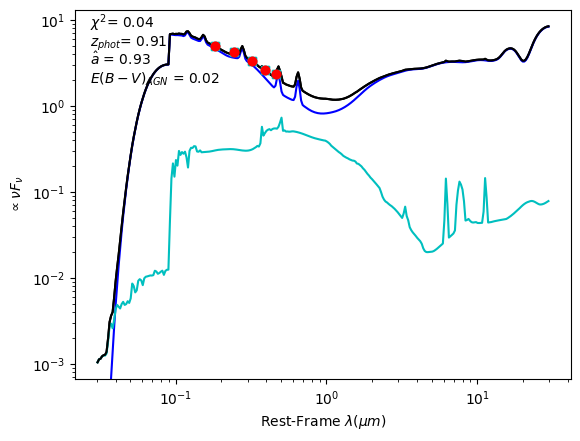

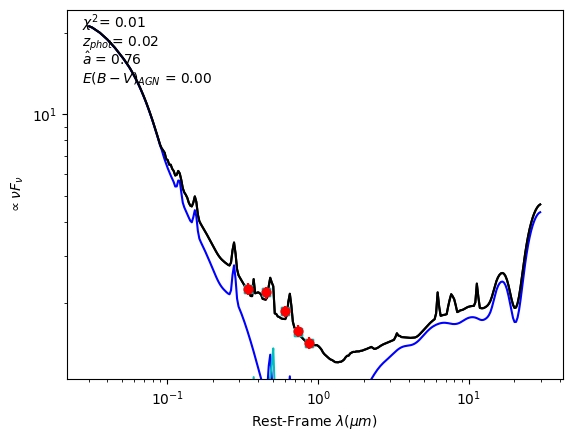

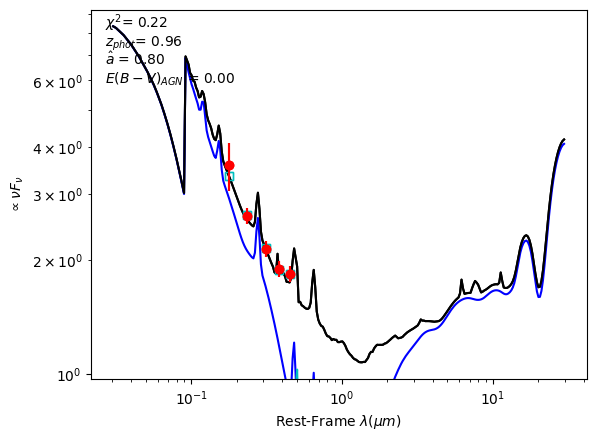

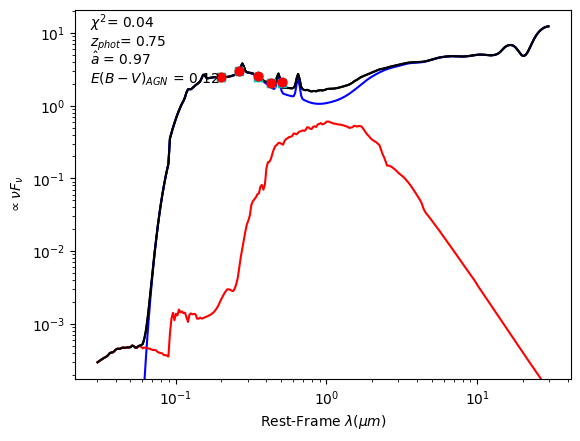

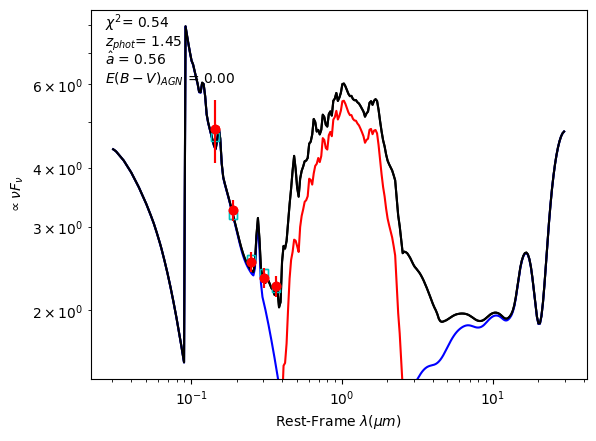

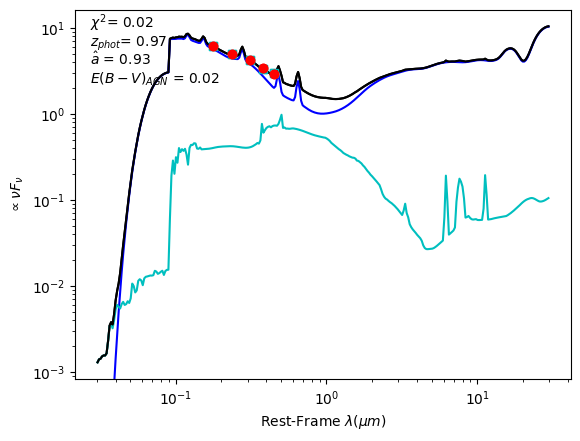

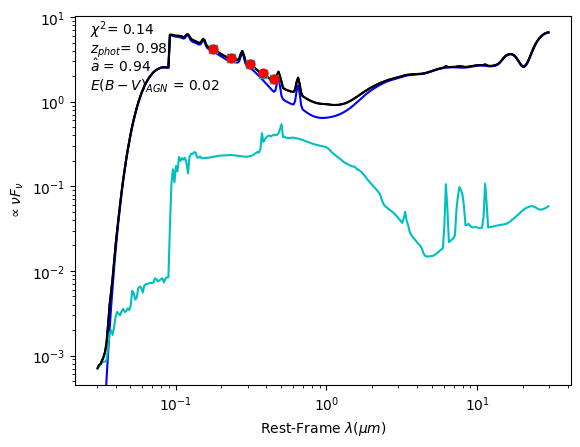

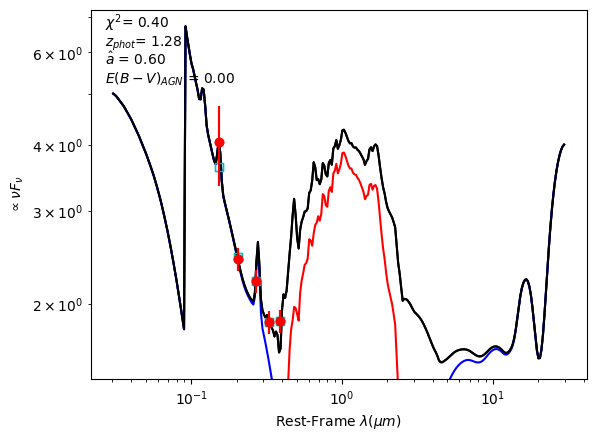

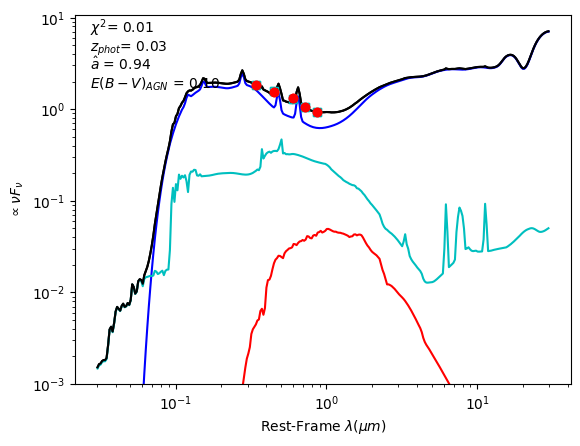

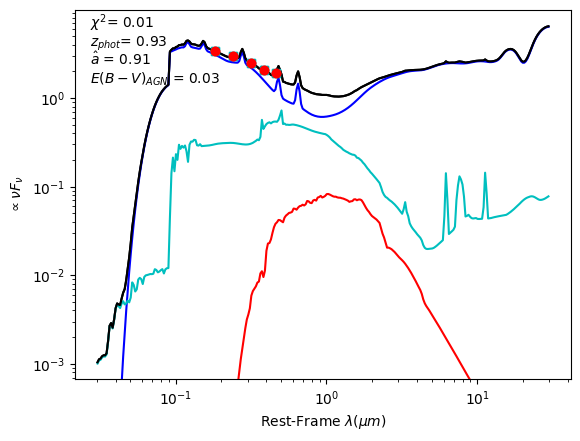

In [3]:
#For every source, create the lrt_model object, load the photometry, run the photo-z fitting, the kc-fitting and plot. 
bands = ["u","g","r","i","z"]
for i in range(len(tab)):
    obj = lrt_model()
    obj.jy = np.zeros(len(bands))
    obj.ejy = np.zeros(len(bands))
    obj.jyuse = np.ones(len(bands), dtype=np.int32)
    for j, band in enumerate(bands):
        if hasattr(tab['psMagErr_{}'.format(band)],'mask') and tab['psMagErr_{}'.format(band)].mask[i]:
            obj.jyuse[j] = 0
        else:
            obj.jy[j] = 3631.*np.exp(-0.4*tab['psMag_{}'.format(band)][i])
            obj.ejy[j] = 0.4*np.log(10.)*obj.jy[j]*tab['psMagErr_{}'.format(band)][i]
    
    #These are bright AGN, so the errors are quite small. While technically correct, they can underestimate the systematics associated to color measurements, so we set here a small noise floor.
    min_ejy = 0.05 * obj.jy
    cond = obj.ejy < min_ejy
    obj.ejy[cond] = min_ejy[cond]

    obj.pz_fit()
    obj.kc_fit()
    obj.plot()